# Titanic Survival-Logistic Regression Classification

**Historical Overview:**

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

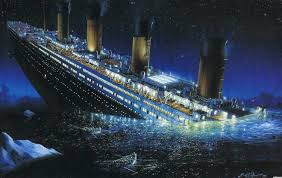

**Goal:**

we neeedto build a predictive model that answers the questions: what sorts of people were more likely to survive? where some features and charactaristics contributed in people survival?

**Data:** 

using passenger data:  name, age, gendersocio-economic class,
parents/children/sibling etc.

the link to the dataset on kaggle:

https://www.kaggle.com/competitions/titanic/data?select=test.csv


### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Load Data

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 19.8MB/s]


In [20]:
! mkdir titanic_data
! unzip titanic.zip -d titanic_data

Archive:  titanic.zip
  inflating: titanic_data/gender_submission.csv  
  inflating: titanic_data/test.csv   
  inflating: titanic_data/train.csv  


In [21]:
training_data=pd.read_csv("/content/titanic_data/train.csv")
training_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### EDA

In [22]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
training_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [24]:
training_data.describe(include="O")

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

* From the first look we can exclude the columns:"Id", "Name" they have no effect

* Investigating the cabin column:

In [25]:
training_data.Cabin[training_data.Survived==1].value_counts()* 100/len(training_data)

B96 B98    0.448934
E101       0.336700
F33        0.336700
B18        0.224467
B20        0.224467
             ...   
C32        0.112233
E34        0.112233
C7         0.112233
C54        0.112233
C148       0.112233
Name: Cabin, Length: 101, dtype: float64

In [26]:
training_data.Cabin[training_data.Survived==0].value_counts()* 100/len(training_data)

G6             0.224467
C22 C26        0.224467
C23 C25 C27    0.224467
F G73          0.224467
D26            0.224467
                 ...   
C91            0.112233
C2             0.112233
T              0.112233
C128           0.112233
B51 B53 B55    0.112233
Name: Cabin, Length: 62, dtype: float64

There is no significance difference between the Cabin, So we will exclude it as well

* Investigating the Ticket column:

In [27]:
training_data.Ticket[training_data.Survived==1].value_counts()* 100/len(training_data)

1601      0.561167
2666      0.448934
113760    0.448934
13502     0.336700
347077    0.336700
            ...   
244367    0.112233
234818    0.112233
28551     0.112233
7598      0.112233
111369    0.112233
Name: Ticket, Length: 260, dtype: float64

In [28]:
training_data.Ticket[training_data.Survived==0].value_counts()* 100/len(training_data)* 100/len(training_data)

347082           0.088174
CA. 2343         0.088174
347088           0.075578
3101295          0.075578
CA 2144          0.075578
                   ...   
349233           0.012596
349236           0.012596
SC/Paris 2163    0.012596
349206           0.012596
370376           0.012596
Name: Ticket, Length: 470, dtype: float64

There is no significance difference between the Tickets, So we will exclude it as well

* Dropping the excluded columns

In [29]:
training_data=training_data.drop(columns=["PassengerId","Name","Cabin","Ticket"])
training_data.head(5)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [30]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


* Handling Missing Values

We've got missing values in 2 columns: "Age" & "Embarked"

1."Age" column: 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


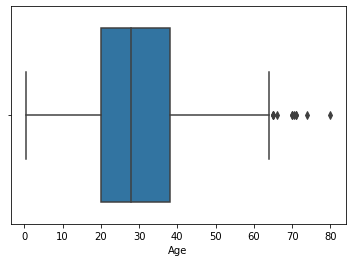

In [31]:
sns.boxplot(training_data["Age"])

Since we have outliers, we will use the median for imputation

In [32]:
training_data["Age"]=training_data["Age"].fillna(training_data["Age"].median())

2."Embarked" column
we will use the most frequent port "S"

In [33]:
training_data["Embarked"]=training_data["Embarked"].fillna("S")

In [34]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


* Data distribution

Text(0.5, 0.98, 'features distribution')

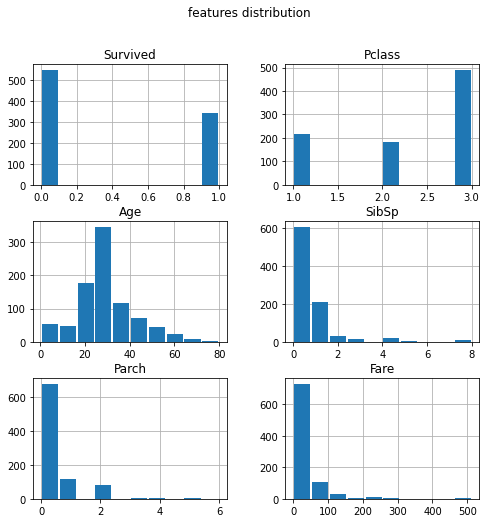

In [35]:
training_data.hist(zorder=2, rwidth=0.9,figsize=(8,8))
plt.suptitle("features distribution")

* Correlation

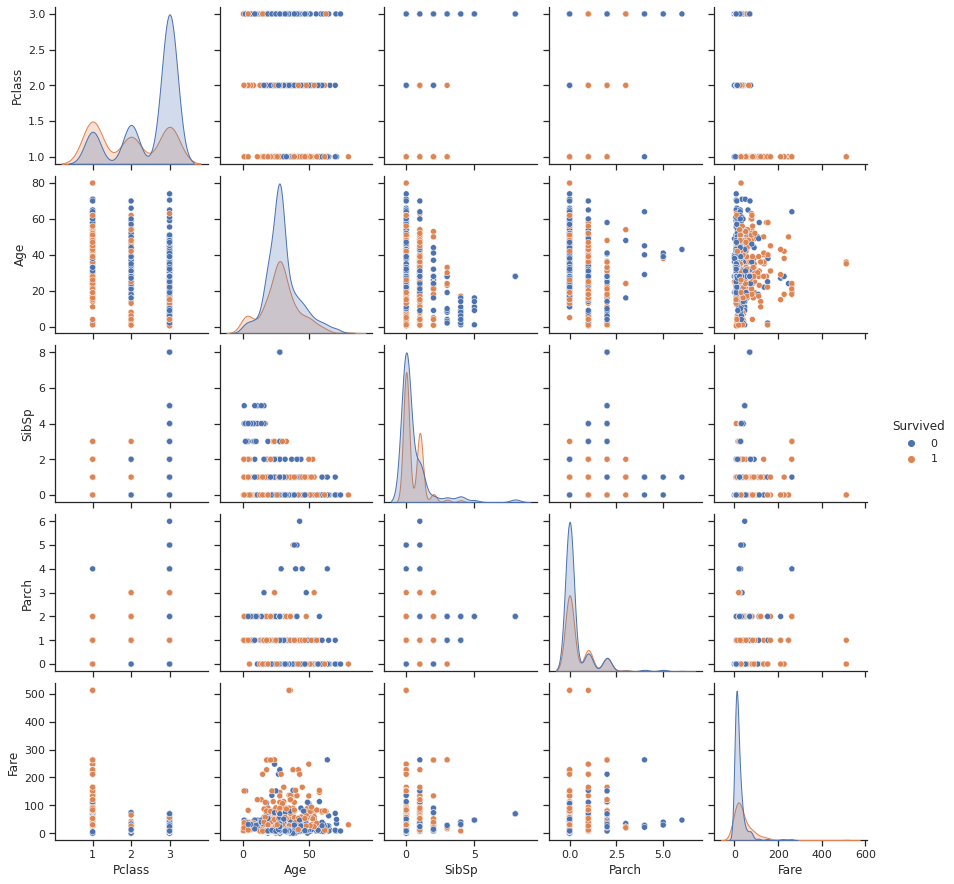

In [36]:
sns.set_theme(style="ticks")
sns.pairplot(training_data, hue="Survived")

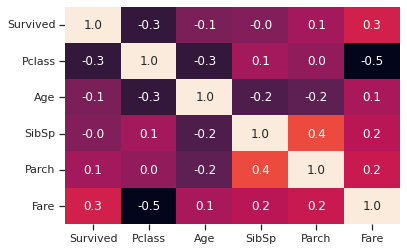

In [37]:
corr=training_data.corr()
sns.heatmap(corr, annot=True, fmt='.1f', cbar=False)

In [38]:
corr["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64

### Data Preparation

* Performing one-hot encoding on the categorical variable

In [39]:
training_data=pd.get_dummies(data=training_data, columns=['Pclass', 'Sex','Embarked'])
training_data.head(5)

Survived   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0      1      0   7.2500         0         0         1   
1         1  38.0      1      0  71.2833         1         0         0   
2         1  26.0      0      0   7.9250         0         0         1   
3         1  35.0      1      0  53.1000         1         0         0   
4         0  35.0      0      0   8.0500         0         0         1   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           0         1           0           0           1  
1           1         0           1           0           0  
2           1         0           0           0           1  
3           1         0           0           0           1  
4           0         1           0           0           1

In [40]:
x_train=training_data.drop(columns=["Survived"])
y_train=training_data["Survived"]

In [41]:
x_train.shape,y_train.shape

((891, 12), (891,))

#### Applying the same data cleaning and preparation on the testing set

In [42]:
testing_data=pd.read_csv("/content/titanic_data/test.csv")
testing_data.head(5)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [43]:
testing_data=testing_data.drop(columns=["PassengerId","Name","Ticket","Cabin"])
testing_data.head(5)

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S

In [44]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [45]:
testing_data["Age"]=testing_data["Age"].fillna(training_data["Age"].median())
testing_data["Fare"]=testing_data["Fare"].fillna(training_data["Fare"].mean())

In [46]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [47]:
testing_data=pd.get_dummies(data=testing_data, columns=['Pclass', 'Sex','Embarked'])
testing_data.head(5)

Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0  34.5      0      0   7.8292         0         0         1           0   
1  47.0      1      0   7.0000         0         0         1           1   
2  62.0      0      0   9.6875         0         1         0           0   
3  27.0      0      0   8.6625         0         0         1           0   
4  22.0      1      1  12.2875         0         0         1           1   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           1           0  
1         0           0           0           1  
2         1           0           1           0  
3         1           0           0           1  
4         0           0           0           1

In [48]:
x_test=testing_data
x_test.shape

(418, 12)

### Features Rescaling 

Check if Features Rescaling is needed

In [49]:
print(f'Ranges of features:{np.ptp(x_train,axis=0)}')

Ranges of features:[ 79.58   8.     6.   512.33   1.     1.     1.     1.     1.     1.
   1.     1.  ]


Rescaling is required

In [50]:
scaler = StandardScaler().fit(x_train.iloc[:, :4])
# to exclude the categorical variables from rescaling
def preprocessor(x):
  A = np.copy(x)
  A[:, :4] = scaler.transform(A[:, :4])
  return A
x_train,x_test=preprocessor(x_train),preprocessor(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [51]:
x_train

array([[-0.57,  0.43, -0.47, ...,  0.  ,  0.  ,  1.  ],
       [ 0.66,  0.43, -0.47, ...,  1.  ,  0.  ,  0.  ],
       [-0.26, -0.47, -0.47, ...,  0.  ,  0.  ,  1.  ],
       ...,
       [-0.1 ,  0.43,  2.01, ...,  0.  ,  0.  ,  1.  ],
       [-0.26, -0.47, -0.47, ...,  1.  ,  0.  ,  0.  ],
       [ 0.2 , -0.47, -0.47, ...,  0.  ,  1.  ,  0.  ]])

In [52]:
x_test

array([[ 0.39, -0.47, -0.47, ...,  0.  ,  1.  ,  0.  ],
       [ 1.36,  0.43, -0.47, ...,  0.  ,  0.  ,  1.  ],
       [ 2.51, -0.47, -0.47, ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 0.7 , -0.47, -0.47, ...,  0.  ,  0.  ,  1.  ],
       [-0.1 , -0.47, -0.47, ...,  0.  ,  0.  ,  1.  ],
       [-0.1 ,  0.43,  0.77, ...,  1.  ,  0.  ,  0.  ]])

In [53]:
print(f'Ranges of training features after rescaling:{np.ptp(x_train,axis=0)}')
print(f'Ranges of  testing features after rescaling:{np.ptp(x_test,axis=0)}')

Ranges of training features after rescaling:[ 6.12  7.26  7.45 10.32  1.    1.    1.    1.    1.    1.    1.    1.  ]
Ranges of  testing features after rescaling:[ 5.83  7.26 11.17 10.32  1.    1.    1.    1.    1.    1.    1.    1.  ]


### Building The Model

In [54]:
logreg=LogisticRegression(random_state=0)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

* Testing the model performance on the training set

In [55]:
logreg.score(x_train,y_train)

0.8058361391694725

In [56]:
y_pred=logreg.predict(x_train)
cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
cnf_matrix

array([[478,  71],
       [102, 240]])

Text(0.5, 257.44, 'Predicted label')

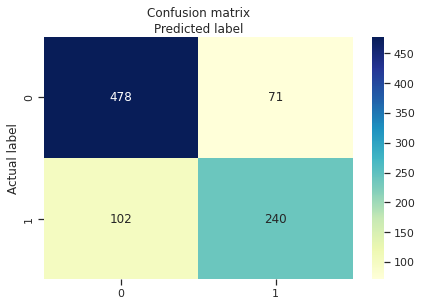

In [57]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Prediction Using the testing set

In [58]:
y_pred=logreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

* Preparing the submission file

In [ ]:
sub=pd.read_csv("/content/titanic_data/gender_submission.csv")
Id=sub["PassengerId"].to_numpy()
submission=pd.DataFrame({"PassengerId":Id,"Survived":y_pred})
submission.to_csv("submission.csv")
submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]